<a href="https://colab.research.google.com/github/Harsh-C7/Medical-Insurance-Cost-Prediction/blob/main/Medical_Insurance_Cost_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

In [50]:
df = pd.read_csv('/content/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [51]:
df.shape

(1338, 7)

In [52]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [54]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


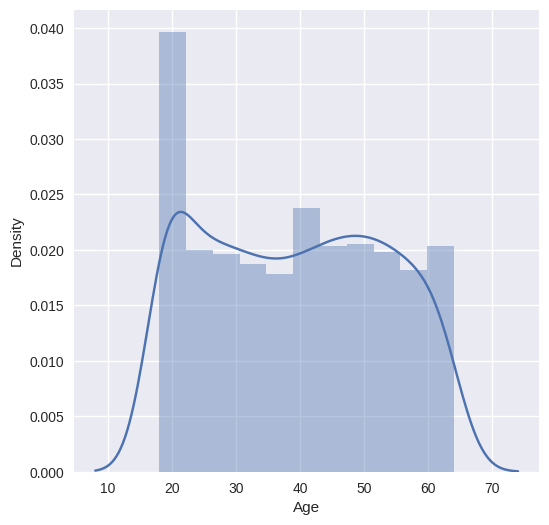

In [55]:
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.xlabel('Age')
plt.show()

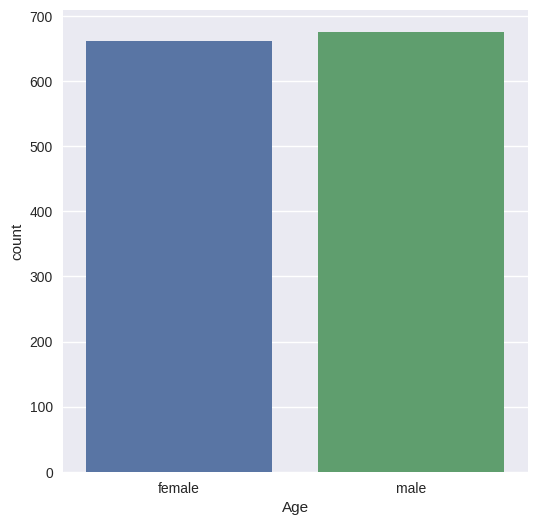

In [56]:
plt.figure(figsize=(6,6))
sns.countplot(x=df['sex'], hue=df['sex'])
plt.xlabel('Age')
plt.show()

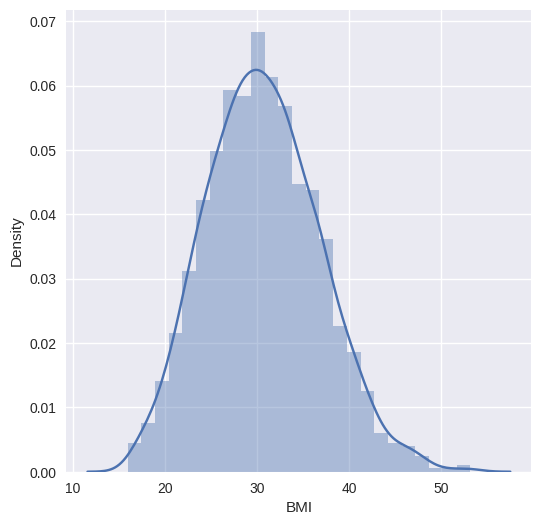

In [57]:
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.xlabel('BMI')
plt.show()

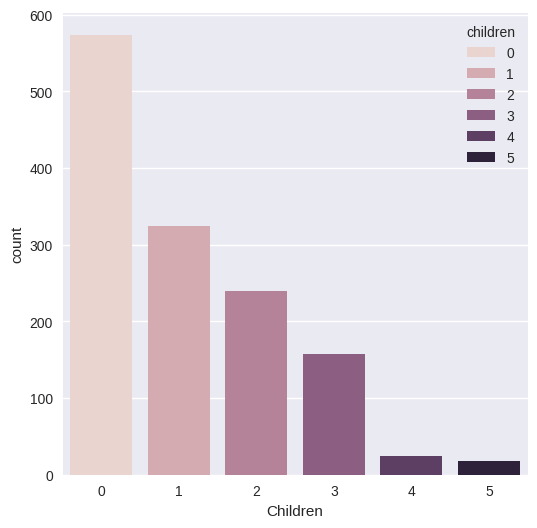

In [58]:
plt.figure(figsize=(6,6))
sns.countplot(x=df['children'], hue=df['children'])
plt.xlabel('Children')
plt.show()

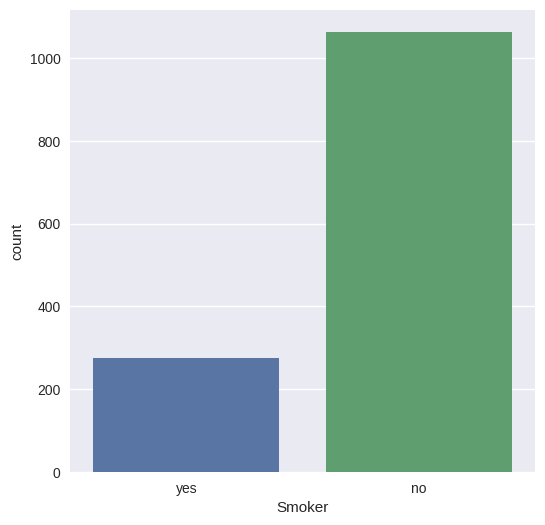

In [59]:
plt.figure(figsize=(6,6))
sns.countplot(x=df['smoker'], hue=df['smoker'])
plt.xlabel('Smoker')
plt.show()

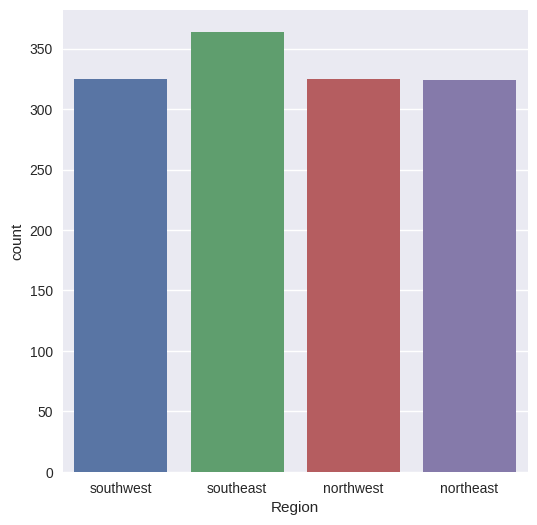

In [60]:
plt.figure(figsize=(6,6))
sns.countplot(x=df['region'], hue=df['region'])
plt.xlabel('Region')
plt.show()

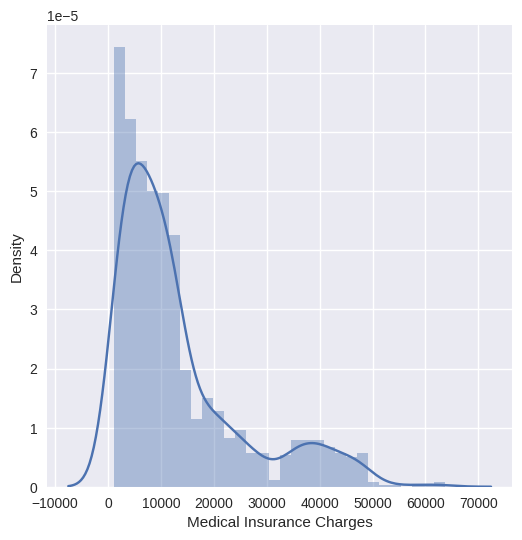

In [61]:
plt.figure(figsize=(6,6))
sns.distplot(x=df['charges'])
plt.xlabel('Medical Insurance Charges')
plt.show()

In [62]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [63]:
le = LabelEncoder()

df["sex"] = le.fit_transform(df["sex"])
df["smoker"] = le.fit_transform(df["smoker"])
df["region"] = le.fit_transform(df["region"])

In [64]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [65]:
x = df.drop('charges', axis=1)
y = df['charges']

In [66]:
print(x)
print(y)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       3
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       0
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       3
1337   61    0  29.070         0       1       1

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [68]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [69]:
print("R Squared for Training Data is ", r2_score(y_train, lr.predict(x_train)))
print("R Squared for Testing Data is ", r2_score(y_test, lr.predict(x_test)))

R Squared for Training Data is  0.7417049283233981
R Squared for Testing Data is  0.7833463107364539


In [70]:
input_data = (31,1,25.74,0,1,0)

id_numpy = np.array([input_data])

prediction = lr.predict(id_numpy)
# prediction

print("The Cost of the insurance will be", prediction[0])

The Cost of the insurance will be 28294.179823294275
